### Date and Time Data Types and Tools

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime

now = datetime.now()
now
now.year, now.month, now.day

(2019, 5, 9)

In [2]:
delta = datetime(2011, 1, 7) - datetime(2008, 6, 24, 8, 15)
delta
delta.days
delta.seconds

56700

In [3]:
from datetime import timedelta

start = datetime(2011, 1, 7)
start + timedelta(12)
start - 2*timedelta(12)
# timedelta represents the difference between two datetime values (as days, seconds, and microseconds)

datetime.datetime(2010, 12, 14, 0, 0)

### Converting between string and datetime

In [4]:
# datetime and pandas Timestamp can be formatted as strings using str or strftime
stamp = datetime(2011, 1, 3)
str(stamp)
stamp.strftime('%y-%m-%d')

'11-01-03'

In [5]:
value = '2011-01-03'
datetime.strptime(value, '%Y-%m-%d')
datestrs = ['7/6/2011', '8/6/2011']
[datetime.strptime(x, '%m/%d/%Y') for x in datestrs]
# datetime.strptime is the best way to parse a date with a known format
# have to write a format spec each time

[datetime.datetime(2011, 7, 6, 0, 0), datetime.datetime(2011, 8, 6, 0, 0)]

In [6]:
# Alternatively
from dateutil.parser import parse

parse('2011-01-03')
parse('Jan 31, 2997 10:45 PM')
parse('6/12/2011', dayfirst=True)

datetime.datetime(2011, 12, 6, 0, 0)

In [7]:
datestrs
pd.to_datetime(datestrs)
idx = pd.to_datetime(datestrs + [None])
idx
idx[2]
pd.isnull(idx)

array([False, False,  True])

### Time Series Basics

In [8]:
from datetime import datetime

dates = [datetime(2011, 1, 2), datetime(2011, 1, 5), datetime(2011, 1, 7), 
        datetime(2011, 1, 8), datetime(2011, 1, 10), datetime(2011, 1, 12)]

ts = pd.Series(np.random.randn(6), index=dates)
ts.index
# when ccreating a Series with a DatetimeIndex, pandas knows that the object is a time series

ts + ts[::2]

2011-01-02    2.067077
2011-01-05         NaN
2011-01-07    0.702732
2011-01-08         NaN
2011-01-10    0.246944
2011-01-12         NaN
dtype: float64

In [9]:
# pandas stores timestamps using Numpy's datetime64 data type ath the nanosecond resolution
ts.index.dtype
# scalar values from a DatetimeIndex are pandas Timestamp objects
stamp = ts.index[0]
stamp

Timestamp('2011-01-02 00:00:00')

### Indexing, Selection, Subsetting

In [10]:
stamp = ts.index[2]
ts[stamp]
ts['1/10/2011']
ts['20110110']

0.1234719777248114

In [11]:
longer_ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))
longer_ts
longer_ts['2001']
longer_ts['2001-05']
ts[datetime(2011, 1, 7):]
ts
ts['1/6/2011':'1/11/2011']
ts.truncate(after='1/9/2011')
dates = pd.date_range('1/1/2000', periods=100, freq='W-WED')
long_df = pd.DataFrame(np.random.randn(100, 4),
                      index=dates,
                      columns=['Colorado', 'Texas', 'New York', 'Ohio'])
long_df.ix['5-2001']

/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:13: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  del sys.path[0]


,Colorado,Texas,New York,Ohio
2001-05-02,0.804361,-0.285015,0.047190,-0.739163
2001-05-09,-0.780666,-0.182296,-0.059186,0.861691
2001-05-16,0.080978,-1.351362,-0.771733,0.172200
2001-05-23,-1.248986,-0.250584,-0.459010,-0.131019
2001-05-30,0.068864,0.333978,0.088732,-0.251199


### Time Series with Duplicate Indices

In [12]:
dates = pd.DatetimeIndex(['1/1/2000', '1/2/2000', '1/2/2000', '1/2/2000', '1/3/2000'])
dup_ts = pd.Series(np.arange(5), index=dates)
dup_ts
dup_ts.index.is_unique

dup_ts['1/3/2000']
dup_ts['1/2/2000']

grouped = dup_ts.groupby(level=0)
grouped.mean()
grouped.count()

2000-01-01    1
2000-01-02    3
2000-01-03    1
dtype: int64

### Date Ranges, Frequencies, and Shifting

In [13]:
ts
ts.resample('D') # add all the dates to the index

DatetimeIndexResampler [freq=<Day>, axis=0, closed=left, label=left, convention=start, base=0]

### Generating Date Ranges

In [14]:
index = pd.date_range('4/1/2012', '6/1/2012')
index

DatetimeIndex(['2012-04-01', '2012-04-02', '2012-04-03', '2012-04-04',
               '2012-04-05', '2012-04-06', '2012-04-07', '2012-04-08',
               '2012-04-09', '2012-04-10', '2012-04-11', '2012-04-12',
               '2012-04-13', '2012-04-14', '2012-04-15', '2012-04-16',
               '2012-04-17', '2012-04-18', '2012-04-19', '2012-04-20',
               '2012-04-21', '2012-04-22', '2012-04-23', '2012-04-24',
               '2012-04-25', '2012-04-26', '2012-04-27', '2012-04-28',
               '2012-04-29', '2012-04-30', '2012-05-01', '2012-05-02',
               '2012-05-03', '2012-05-04', '2012-05-05', '2012-05-06',
               '2012-05-07', '2012-05-08', '2012-05-09', '2012-05-10',
               '2012-05-11', '2012-05-12', '2012-05-13', '2012-05-14',
               '2012-05-15', '2012-05-16', '2012-05-17', '2012-05-18',
               '2012-05-19', '2012-05-20', '2012-05-21', '2012-05-22',
               '2012-05-23', '2012-05-24', '2012-05-25', '2012-05-26',
      

In [15]:
pd.date_range(start='4/1/2012', periods=20)
pd.date_range(end='6/1/2012', periods=20)
pd.date_range('1/1/2000', '12/1/2000', freq='BM')
pd.date_range('5/2/2012 12:56:31', periods=5)
# normalize to midnight
pd.date_range('5/2/2012 12:56:31', periods=5, normalize=True)

DatetimeIndex(['2012-05-02', '2012-05-03', '2012-05-04', '2012-05-05',
               '2012-05-06'],
              dtype='datetime64[ns]', freq='D')

### Frequencies and Date Offsets

In [16]:
from pandas.tseries.offsets import Hour, Minute

hour = Hour()
four_hours = Hour(4)

pd.date_range('1/1/2000', '1/3/2000 23:59', freq='4h')

Hour(2) + Minute(30)

pd.date_range('1/1/2000', periods=10, freq='1h30min')

# Week of month dates
rng = pd.date_range('1/1/2012', '9/1/2012', freq='WOM-3FRI')
list(rng)

[Timestamp('2012-01-20 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-02-17 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-03-16 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-04-20 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-05-18 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-06-15 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-07-20 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-08-17 00:00:00', freq='WOM-3FRI')]

### Shifting (Leading and Lagging) Data

In [17]:
ts = pd.Series(np.random.randn(4),
              index=pd.date_range('1/1/2000', periods=4, freq='M'))
ts
ts.shift(2)
ts.shift(-2)
ts.shift(-2, freq='M')
ts.shift(3, freq='D')
ts.shift(1, freq='3D')
ts.shift(1, freq='90T')

2000-01-31 01:30:00   -0.830340
2000-02-29 01:30:00   -0.229362
2000-03-31 01:30:00    0.390124
2000-04-30 01:30:00    0.418144
Freq: M, dtype: float64

In [18]:
# Shifting dates with offsets
from pandas.tseries.offsets import Day, MonthEnd

now = datetime(2011, 11, 17)
now + 3 * Day()
now + MonthEnd()
now + MonthEnd(2)

offset = MonthEnd()
offset.rollforward(now)
offset.rollback(now)

Timestamp('2011-10-31 00:00:00')

In [19]:
ts = pd.Series(np.random.randn(20),
              index=pd.date_range('1/15/2000', periods=20, freq='4d'))
ts.groupby(offset.rollforward).mean
# alternatively
ts.resample('M', how='mean')

/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:5: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).mean()
  """


2000-01-31   -0.369929
2000-02-29    0.444855
2000-03-31    0.139077
Freq: M, dtype: float64

### Time Zone Handling

In [20]:
import pytz

pytz.common_timezones[-5:]
tz = pytz.timezone('US/Eastern')
tz

<DstTzInfo 'US/Eastern' LMT-1 day, 19:04:00 STD>

In [21]:
# Localization and Conversion
rng = pd.date_range('3/9/2012 9:30', periods=6, freq='D')
ts = pd.Series(np.random.randn(len(rng)), index=rng)
print(ts.index.tz)

None


In [22]:
pd.date_range('3/9/2012 9:30', periods=10, freq='D', tz='UTC')
ts_utc = ts.tz_localize('UTC')
ts_utc

2012-03-09 09:30:00+00:00    0.033103
2012-03-10 09:30:00+00:00    1.226144
2012-03-11 09:30:00+00:00   -0.197374
2012-03-12 09:30:00+00:00    0.688459
2012-03-13 09:30:00+00:00   -0.328839
2012-03-14 09:30:00+00:00   -1.642938
Freq: D, dtype: float64

In [23]:
ts_utc.index
ts_utc.tz_convert('US/Eastern')

2012-03-09 04:30:00-05:00    0.033103
2012-03-10 04:30:00-05:00    1.226144
2012-03-11 05:30:00-04:00   -0.197374
2012-03-12 05:30:00-04:00    0.688459
2012-03-13 05:30:00-04:00   -0.328839
2012-03-14 05:30:00-04:00   -1.642938
Freq: D, dtype: float64

In [24]:
ts.tz_localize('US/Eastern')

2012-03-09 09:30:00-05:00    0.033103
2012-03-10 09:30:00-05:00    1.226144
2012-03-11 09:30:00-04:00   -0.197374
2012-03-12 09:30:00-04:00    0.688459
2012-03-13 09:30:00-04:00   -0.328839
2012-03-14 09:30:00-04:00   -1.642938
Freq: D, dtype: float64

In [25]:
ts.tz_localize('US/Eastern').tz_convert('UTC')

2012-03-09 14:30:00+00:00    0.033103
2012-03-10 14:30:00+00:00    1.226144
2012-03-11 13:30:00+00:00   -0.197374
2012-03-12 13:30:00+00:00    0.688459
2012-03-13 13:30:00+00:00   -0.328839
2012-03-14 13:30:00+00:00   -1.642938
Freq: D, dtype: float64

In [26]:
ts.tz_localize('US/Eastern').tz_convert('Europe/Berlin')

2012-03-09 15:30:00+01:00    0.033103
2012-03-10 15:30:00+01:00    1.226144
2012-03-11 14:30:00+01:00   -0.197374
2012-03-12 14:30:00+01:00    0.688459
2012-03-13 14:30:00+01:00   -0.328839
2012-03-14 14:30:00+01:00   -1.642938
Freq: D, dtype: float64

In [27]:
ts.index.tz_localize('Asia/Shanghai')

DatetimeIndex(['2012-03-09 09:30:00+08:00', '2012-03-10 09:30:00+08:00',
               '2012-03-11 09:30:00+08:00', '2012-03-12 09:30:00+08:00',
               '2012-03-13 09:30:00+08:00', '2012-03-14 09:30:00+08:00'],
              dtype='datetime64[ns, Asia/Shanghai]', freq='D')

In [28]:
ts.index.tz_localize('Asia/Shanghai').tz_convert('Europe/Berlin')

DatetimeIndex(['2012-03-09 02:30:00+01:00', '2012-03-10 02:30:00+01:00',
               '2012-03-11 02:30:00+01:00', '2012-03-12 02:30:00+01:00',
               '2012-03-13 02:30:00+01:00', '2012-03-14 02:30:00+01:00'],
              dtype='datetime64[ns, Europe/Berlin]', freq='D')

In [29]:
ts.index.tz_localize('Asia/Shanghai').tz_convert('Asia/Tokyo')

DatetimeIndex(['2012-03-09 10:30:00+09:00', '2012-03-10 10:30:00+09:00',
               '2012-03-11 10:30:00+09:00', '2012-03-12 10:30:00+09:00',
               '2012-03-13 10:30:00+09:00', '2012-03-14 10:30:00+09:00'],
              dtype='datetime64[ns, Asia/Tokyo]', freq='D')

### Operations with Time Zone - aware Timestamp Objects

In [30]:
stamp = pd.Timestamp('2011-03-12 04:00')
stamp_utc = stamp.tz_localize('utc')
stamp_utc.tz_convert('US/Eastern')

Timestamp('2011-03-11 23:00:00-0500', tz='US/Eastern')

In [31]:
stamp_moscow = pd.Timestamp('2011-03-12 04:00', tz='Europe/Moscow')
stamp_moscow

Timestamp('2011-03-12 04:00:00+0300', tz='Europe/Moscow')

In [32]:
# nanoseconds since the UNIX ephoch (Jan 1, 1970)
stamp_utc.value

1299902400000000000

In [33]:
stamp_utc.tz_convert('US/Eastern').value

1299902400000000000

In [34]:
stamp.tz_localize('Asia/Tokyo').value

1299870000000000000

In [35]:
# 30 min before DST transition
from pandas.tseries.offsets import Hour
stamp = pd.Timestamp('2012-03-12 01:30', tz='US/Eastern')
stamp
stamp + Hour()

# 90 min before DST transition
stamp = pd.Timestamp('2012-11-04 00:30', tz='US/Eastern')
stamp
stamp + 2 * Hour()

Timestamp('2012-11-04 01:30:00-0500', tz='US/Eastern')

In [36]:
# Operations between Different Time Zones
# when different time zones are combined, the result will be UTC
rng = pd.date_range('3/7/2012 9:30', periods=10, freq='B')
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ts
ts1 = ts[:7].tz_localize('Europe/London')
ts2 = ts1[2:].tz_convert('Europe/Moscow')
result = ts1 + ts2
result.index

DatetimeIndex(['2012-03-07 09:30:00+00:00', '2012-03-08 09:30:00+00:00',
               '2012-03-09 09:30:00+00:00', '2012-03-12 09:30:00+00:00',
               '2012-03-13 09:30:00+00:00', '2012-03-14 09:30:00+00:00',
               '2012-03-15 09:30:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='B')

### Periods and Period Arithmetic

In [37]:
# periods - time spans (days, months, etic.)
# 01/01/2007 - 12/31/2007
p = pd.Period(2007, freq='A-DEC')
p
p + 5
p - 2
pd.Period('2014', freq='A-DEC') - p

rng = pd.period_range('1/1/2000', '6/30/2000', freq='M')
rng

pd.Series(np.random.randn(6), index=rng)

values=['2001Q3', '2002Q2', '2003Q1']
index = pd.PeriodIndex(values, freq='Q-DEC')
index

PeriodIndex(['2001Q3', '2002Q2', '2003Q1'], dtype='period[Q-DEC]', freq='Q-DEC')

#### Period Frequency Conversion

In [38]:
p = pd.Period('2007', freq='A-DEC')
p.asfreq('M', how='start')
p.asfreq('M', how='end')

p = pd.Period('2007', freq='A-JUN')
p.asfreq('M', 'start')

Period('2006-07', 'M')

In [39]:
# for a fiscal year ending on a month other than Dec, the monthly subperiods belonging are different
p.asfreq('M', 'end')

Period('2007-06', 'M')

In [40]:
# converting from high to low frequency
p = pd.Period('Aug-2007', 'M')
p.asfreq('A-JUN')

p = pd.Period('Jun-2007', 'M')
p.asfreq('A-JUN')

p = pd.Period('Jul-2007', 'M')
p.asfreq('A-JUN')

p = pd.Period('Jul-2007', 'M')
p.asfreq('A-JUL')

Period('2007', 'A-JUL')

In [41]:
rng = pd.period_range('2006', '2009', freq='A-DEC')
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ts

2006   -0.873005
2007   -0.989022
2008    1.125735
2009   -1.053472
Freq: A-DEC, dtype: float64

In [42]:
# M - monthend
ts.asfreq('M', how='start')

# B - Business Day
ts.asfreq('B', how='end')

2006-12-29   -0.873005
2007-12-31   -0.989022
2008-12-31    1.125735
2009-12-31   -1.053472
Freq: B, dtype: float64

#### Quarterly Period Frequencies

In [43]:
# much quarterly data is reported relative to a fiscal year end, typically the last calendar or business day of one of the 12 months of the year.
# the Q4 in 2012 of the fiscal year that ends in last day of January
p = pd.Period('2012Q4', freq='Q-JAN')
p
p.asfreq('D', 'start')
p.asfreq('D', 'end')

Period('2012-01-31', 'D')

In [44]:
# to get the timestamp at 4PM on the 2nd to last business day of the quarter
p4pm = (p.asfreq('B', 'e') - 1).asfreq('T', 's') + 16 * 60
p4pm
p4pm.to_timestamp()

Timestamp('2012-01-30 16:00:00')

In [45]:
# generate quarterly ranges
rng = pd.period_range('2011Q3', '2012Q4', freq='Q-JAN')
ts = pd.Series(np.arange(len(rng)), index=rng)
new_rng = (rng.asfreq('B', 'e')-1).asfreq('T', 's') + 16*60
ts.index = new_rng.to_timestamp()
ts

2010-10-28 16:00:00    0
2011-01-28 16:00:00    1
2011-04-28 16:00:00    2
2011-07-28 16:00:00    3
2011-10-28 16:00:00    4
2012-01-30 16:00:00    5
dtype: int64

In [46]:
# Converting Timestamps to Periods (and Back)
rng = pd.date_range('1/1/2000', periods=3, freq='M')
ts = pd.Series(np.random.randn(3), index=rng)
pts = ts.to_period()
ts

2000-01-31    0.541022
2000-02-29   -0.939236
2000-03-31   -0.346764
Freq: M, dtype: float64

In [47]:
pts

2000-01    0.541022
2000-02   -0.939236
2000-03   -0.346764
Freq: M, dtype: float64

In [48]:
rng = pd.date_range('1/29/2000', periods=6, freq='D')
ts2 = pd.Series(np.random.randn(6), index=rng)
ts2.to_period('M')

2000-01   -0.408430
2000-01   -0.499661
2000-01    0.347488
2000-02   -1.492737
2000-02   -1.040027
2000-02   -0.661532
Freq: M, dtype: float64

In [49]:
pts = ts.to_period()
pts

2000-01    0.541022
2000-02   -0.939236
2000-03   -0.346764
Freq: M, dtype: float64

In [50]:
pts.to_timestamp(how='end')

2000-01-31 23:59:59.999999999    0.541022
2000-02-29 23:59:59.999999999   -0.939236
2000-03-31 23:59:59.999999999   -0.346764
Freq: M, dtype: float64

In [51]:
# Creating sa PeriodIndex from Arrays
data = pd.read_csv('ch08/macrodata.csv')
data.year
data.quarter
index = pd.PeriodIndex(year=data.year, quarter=data.quarter, freq='Q-DEC')
index
data.index = index
data.infl

1959Q1    0.00
1959Q2    2.34
1959Q3    2.74
1959Q4    0.27
1960Q1    2.31
1960Q2    0.14
1960Q3    2.70
1960Q4    1.21
1961Q1   -0.40
1961Q2    1.47
1961Q3    0.80
1961Q4    0.80
1962Q1    2.26
1962Q2    0.13
1962Q3    2.11
1962Q4    0.79
1963Q1    0.53
1963Q2    2.75
1963Q3    0.78
1963Q4    2.46
1964Q1    0.13
1964Q2    0.90
1964Q3    1.29
1964Q4    2.05
1965Q1    1.28
1965Q2    2.54
1965Q3    0.89
1965Q4    2.90
1966Q1    4.99
1966Q2    2.10
          ... 
2002Q2    1.56
2002Q3    2.66
2002Q4    3.08
2003Q1    1.31
2003Q2    1.09
2003Q3    2.60
2003Q4    3.02
2004Q1    2.35
2004Q2    3.61
2004Q3    3.58
2004Q4    2.09
2005Q1    4.15
2005Q2    1.85
2005Q3    9.14
2005Q4    0.40
2006Q1    2.60
2006Q2    3.97
2006Q3   -1.58
2006Q4    3.30
2007Q1    4.58
2007Q2    2.75
2007Q3    3.45
2007Q4    6.38
2008Q1    2.82
2008Q2    8.53
2008Q3   -3.16
2008Q4   -8.79
2009Q1    0.94
2009Q2    3.37
2009Q3    3.56
Freq: Q-DEC, Name: infl, Length: 203, dtype: float64

### Resampling and Frequency Conversion

In [52]:
# Resampling refers to the process of converting a time series from one frequency to another
# aggregating higher frequency data to lower frequency - downsampling; upsampling
from numpy.random import randn

rng = pd.date_range('1/1/2000', periods=100, freq='D')
ts = pd.Series(randn(len(rng)), index=rng)
ts.resample('M', how='mean')
ts.resample('M', how='mean', kind='period')

/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:7: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).mean()
  import sys
/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:8: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).mean()
  


2000-01   -0.337164
2000-02   -0.022927
2000-03    0.177488
2000-04   -0.019767
Freq: M, dtype: float64

#### Downsampling

In [53]:
rng = pd.date_range('1/1/2000', periods=12, freq='T') # T/min - min
ts = pd.Series(np.arange(12), index=rng)
ts

2000-01-01 00:00:00     0
2000-01-01 00:01:00     1
2000-01-01 00:02:00     2
2000-01-01 00:03:00     3
2000-01-01 00:04:00     4
2000-01-01 00:05:00     5
2000-01-01 00:06:00     6
2000-01-01 00:07:00     7
2000-01-01 00:08:00     8
2000-01-01 00:09:00     9
2000-01-01 00:10:00    10
2000-01-01 00:11:00    11
Freq: T, dtype: int64

In [54]:
# want to aggregate into five-minute chunks or bars by taking the sum of each group
ts.resample('5min', how='sum')

/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:2: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).sum()
  


2000-01-01 00:00:00    10
2000-01-01 00:05:00    35
2000-01-01 00:10:00    21
Freq: 5T, dtype: int64

In [55]:
# by default, the left bin edge is inclusive
ts.resample('5min', how='sum', closed='right')

/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:2: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).sum()
  


1999-12-31 23:55:00     0
2000-01-01 00:00:00    15
2000-01-01 00:05:00    40
2000-01-01 00:10:00    11
Freq: 5T, dtype: int64

In [56]:
ts.resample('5min', how='sum', closed='right', label='right')

/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:1: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).sum()
  """Entry point for launching an IPython kernel.


2000-01-01 00:00:00     0
2000-01-01 00:05:00    15
2000-01-01 00:10:00    40
2000-01-01 00:15:00    11
Freq: 5T, dtype: int64

In [57]:
# shift the result index by some amount to make it more clear which interval the timestamp refers to
ts.resample('5min', how='sum', closed='right', label='right', loffset='-1s')

/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:2: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).sum()
  


1999-12-31 23:59:59     0
2000-01-01 00:04:59    15
2000-01-01 00:09:59    40
2000-01-01 00:14:59    11
Freq: 5T, dtype: int64

In [58]:
# Open-High-Low-Close (OHLC) resampling - Finance
ts.resample('5min', how='ohlc')

/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:2: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).ohlc()
  


,open,high,low,close
2000-01-01 00:00:00,0,4,0,4
2000-01-01 00:05:00,5,9,5,9
2000-01-01 00:10:00,10,11,10,11


In [59]:
# Resampling with GroupBy
rng = pd.date_range('1/1/2000', periods=100, freq='D')
ts = pd.Series(np.arange(100), index=rng)
ts.groupby(lambda x:x.month).mean()

1    15
2    45
3    75
4    95
dtype: int64

In [60]:
ts.groupby(lambda x: x.weekday).mean()

0    47.5
1    48.5
2    49.5
3    50.5
4    51.5
5    49.0
6    50.0
dtype: float64

#### Upsampling and Interpolation

In [61]:
frame = pd.DataFrame(np.random.randn(2,4), 
                    index=pd.date_range('1/1/2000', periods=2, freq='W-WED'),
                    columns=['Colorado', 'Texas', 'New York', 'Ohio'])
frame

,Colorado,Texas,New York,Ohio
2000-01-05,-0.613650,-0.008054,1.854294,-1.337080
2000-01-12,0.316194,-0.552268,-0.976391,1.479841


In [62]:
# by default missing values are introduced
df_daily = frame.resample('D')
df_daily

DatetimeIndexResampler [freq=<Day>, axis=0, closed=left, label=left, convention=start, base=0]

In [63]:
# fill forward each weekly value on the non-Wednesdays
frame.resample('D', fill_method='ffill')

/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:2: FutureWarning: fill_method is deprecated to .resample()
the new syntax is .resample(...).ffill()
  


,Colorado,Texas,New York,Ohio
2000-01-05,-0.613650,-0.008054,1.854294,-1.337080
2000-01-06,-0.613650,-0.008054,1.854294,-1.337080
2000-01-07,-0.613650,-0.008054,1.854294,-1.337080
2000-01-08,-0.613650,-0.008054,1.854294,-1.337080
2000-01-09,-0.613650,-0.008054,1.854294,-1.337080
2000-01-10,-0.613650,-0.008054,1.854294,-1.337080
2000-01-11,-0.613650,-0.008054,1.854294,-1.337080
2000-01-12,0.316194,-0.552268,-0.976391,1.479841


In [64]:
# only fill a certain number of periods forward
frame.resample('D', fill_method='ffill', limit=2)

/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:2: FutureWarning: fill_method is deprecated to .resample()
the new syntax is .resample(...).ffill(limit=2)
  


,Colorado,Texas,New York,Ohio
2000-01-05,-0.613650,-0.008054,1.854294,-1.337080
2000-01-06,-0.613650,-0.008054,1.854294,-1.337080
2000-01-07,-0.613650,-0.008054,1.854294,-1.337080
2000-01-08,NaN,NaN,NaN,NaN
2000-01-09,NaN,NaN,NaN,NaN
2000-01-10,NaN,NaN,NaN,NaN
2000-01-11,NaN,NaN,NaN,NaN
2000-01-12,0.316194,-0.552268,-0.976391,1.479841


In [65]:
# the new date index need not overlap with the old one
frame.resample('W-THU', fill_method='ffill')

/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:2: FutureWarning: fill_method is deprecated to .resample()
the new syntax is .resample(...).ffill()
  


,Colorado,Texas,New York,Ohio
2000-01-06,-0.613650,-0.008054,1.854294,-1.337080
2000-01-13,0.316194,-0.552268,-0.976391,1.479841


In [66]:
# Resampling with Periods
frame = pd.DataFrame(np.random.randn(24, 4),
                    index=pd.period_range('1-2000', '12-2001', freq='M'),
                    columns=['Colorado', 'Texas', 'New York', 'Ohio'])
frame[:5]

,Colorado,Texas,New York,Ohio
2000-01,-1.191519,-0.279046,1.446768,-2.901910
2000-02,0.417105,-0.355735,2.535992,1.885754
2000-03,2.002622,0.560878,0.700924,-0.037649
2000-04,0.945777,1.811564,-0.311231,-1.304977
2000-05,-0.987476,-0.305761,0.910115,-1.214271


In [67]:
annual_frame = frame.resample('A-DEC', how='mean')
annual_frame

/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:1: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).mean()
  """Entry point for launching an IPython kernel.


,Colorado,Texas,New York,Ohio
2000,0.037563,0.237916,0.489788,-0.486454
2001,-0.107630,-0.171328,-0.563736,-0.008906


In [68]:
# Q-DEC: Quarterly, year ending in December
annual_frame.resample('Q-DEC', fill_method='ffill')

/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:2: FutureWarning: fill_method is deprecated to .resample()
the new syntax is .resample(...).ffill()
  


,Colorado,Texas,New York,Ohio
2000Q1,0.037563,0.237916,0.489788,-0.486454
2000Q2,0.037563,0.237916,0.489788,-0.486454
2000Q3,0.037563,0.237916,0.489788,-0.486454
2000Q4,0.037563,0.237916,0.489788,-0.486454
2001Q1,-0.107630,-0.171328,-0.563736,-0.008906
2001Q2,-0.107630,-0.171328,-0.563736,-0.008906
2001Q3,-0.107630,-0.171328,-0.563736,-0.008906
2001Q4,-0.107630,-0.171328,-0.563736,-0.008906


In [69]:
annual_frame.resample('Q-DEC', fill_method='ffill', convention='start')

/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:1: FutureWarning: fill_method is deprecated to .resample()
the new syntax is .resample(...).ffill()
  """Entry point for launching an IPython kernel.


,Colorado,Texas,New York,Ohio
2000Q1,0.037563,0.237916,0.489788,-0.486454
2000Q2,0.037563,0.237916,0.489788,-0.486454
2000Q3,0.037563,0.237916,0.489788,-0.486454
2000Q4,0.037563,0.237916,0.489788,-0.486454
2001Q1,-0.107630,-0.171328,-0.563736,-0.008906
2001Q2,-0.107630,-0.171328,-0.563736,-0.008906
2001Q3,-0.107630,-0.171328,-0.563736,-0.008906
2001Q4,-0.107630,-0.171328,-0.563736,-0.008906


In [70]:
# in downsampling, the target frequency must be a subperiod of the source frequency
# in upsampling, the target frequency must be a superperiod of the source frequency
annual_frame.resample('Q-MAR', fill_method='ffill')

/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:3: FutureWarning: fill_method is deprecated to .resample()
the new syntax is .resample(...).ffill()
  This is separate from the ipykernel package so we can avoid doing imports until


,Colorado,Texas,New York,Ohio
2000Q4,0.037563,0.237916,0.489788,-0.486454
2001Q1,0.037563,0.237916,0.489788,-0.486454
2001Q2,0.037563,0.237916,0.489788,-0.486454
2001Q3,0.037563,0.237916,0.489788,-0.486454
2001Q4,-0.107630,-0.171328,-0.563736,-0.008906
2002Q1,-0.107630,-0.171328,-0.563736,-0.008906
2002Q2,-0.107630,-0.171328,-0.563736,-0.008906
2002Q3,-0.107630,-0.171328,-0.563736,-0.008906


### Time Series Plotting

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2292 entries, 2003-01-02 to 2011-10-14
Freq: B
Data columns (total 3 columns):
AAPL    2292 non-null float64
MSFT    2292 non-null float64
XOM     2292 non-null float64
dtypes: float64(3)
memory usage: 71.6 KB


/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:6: FutureWarning: fill_method is deprecated to .resample()
the new syntax is .resample(...).ffill()
  


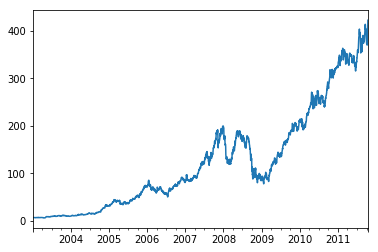

In [84]:
# stock price data from Yahoo! Finance
import matplotlib.pyplot as plt

close_px_all = pd.read_csv('ch09/stock_px.csv', parse_dates=True, index_col=0)
close_px = close_px_all[['AAPL', 'MSFT', 'XOM']]
close_px = close_px.resample('B', fill_method='ffill')
close_px.info()

close_px['AAPL'].plot()

/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


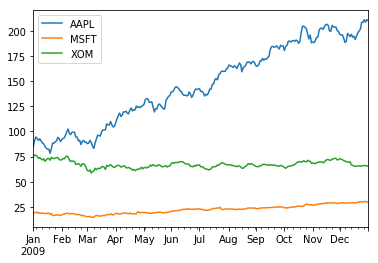

In [85]:
close_px.ix['2009'].plot()

/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


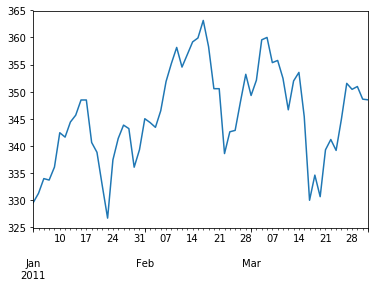

In [86]:
close_px['AAPL'].ix['01-2011':'03-2011'].plot()

/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:1: FutureWarning: fill_method is deprecated to .resample()
the new syntax is .resample(...).ffill()
  """Entry point for launching an IPython kernel.
/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


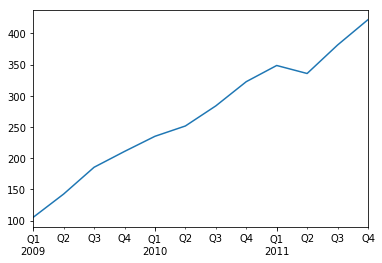

In [150]:
aapl_q = close_px['AAPL'].resample('Q-DEC', fill_method='ffill')
aapl_q.ix['2009':].plot()

### Moving Window Functions

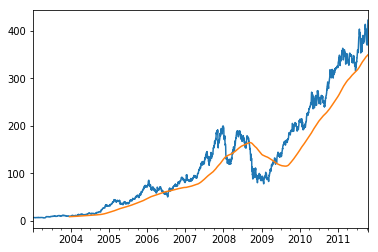

In [94]:
# A common class of array transformations intended for time series operations are statistics 
# and other functions evaluated over a sliding window or with exponentially decaying weights
# by default functions like rolling_mean require the indicated number of non-NA observations
# rolling_mean
close_px.AAPL.plot()
# pd.rolling_mean(close_px.AAPL, 250).plot()
close_px.AAPL.rolling(250).mean().plot()

In [147]:
# aapl_std250 = pd.rolling_std(close_px.AAPL, 250, min_periods=10)
aapl_std250 = close_px.AAPL.rolling(250, 10).std()
aapl_std250[5:12]

2003-01-09         NaN
2003-01-10         NaN
2003-01-13         NaN
2003-01-14         NaN
2003-01-15    0.077496
2003-01-16    0.074760
2003-01-17    0.112368
Freq: B, Name: AAPL, dtype: float64

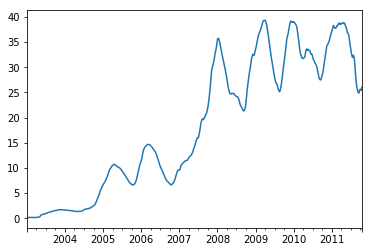

In [148]:
aapl_std250.plot()

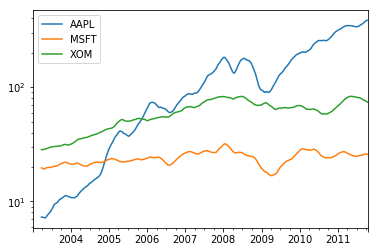

In [149]:
# expanding_mean = lambda x: rolling_mean(x, len(x), min_periods=1)
# pd.rolling_mean(close_px, 60).plot(logy=True)
expanding_mean = lambda x: x.rolling(len(x), 1).mean()
close_px.rolling(60).mean().plot(logy=True)

In [ ]:
# rolling_count, rolling_sum, rolling_mean, rolling_median,
# rolling_var, rolling_std, rolling_skew, rolling_kurt, rolling_min/max
# rolling_quantile, rolling_corr, rolling_cov, rolling_apply
# ewma, ewmvar, ewmstd, ewmcorr, ewmcov
# ewma - exponentially-weighted moving average

#### Exponentially-weighted functions

Text(0.5,1,'Exponentially-weighted MA')

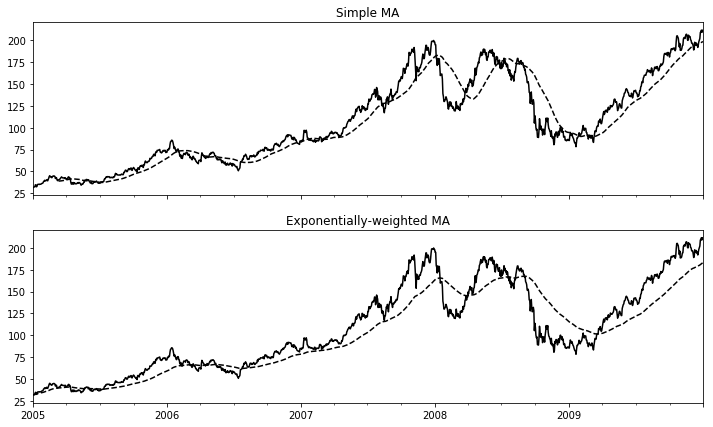

In [146]:
fig, axes = plt.subplots(nrows=2, ncols=1, sharex=True, sharey=True, figsize=(12, 7))
aapl_px = close_px.AAPL['2005':'2009']
# ma60 = pd.rolling_mean(aapl_px, 60, min_periods=50)
ma60 = aapl_px.rolling(60, 50).mean()
# ewma60 = pd.ewma(aapl_px, span=60)
ewma60 = aapl_px.ewm(60).mean()

aapl_px.plot(style='k-', ax=axes[0])
ma60.plot(style='k--', ax=axes[0])
aapl_px.plot(style='k-', ax=axes[1])
ewma60.plot(style='k--', ax=axes[1])
axes[0].set_title('Simple MA')
axes[1].set_title('Exponentially-weighted MA')

#### Binary Moving Window Functions

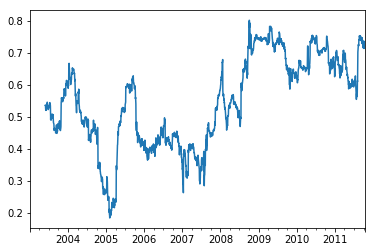

In [145]:
spx_px = close_px_all.SPX   
spx_rets = spx_px / spx_px.shift(1) - 1
returns = close_px.pct_change()
# corr = pd.rolling_corr(returns.AAPL, spx_rets, 125, min_perio   ds=100)
corr = returns.AAPL.rolling(125, 100).corr(spx_rets)
corr.plot()

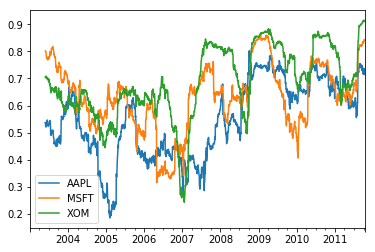

In [151]:
# corr = pd.rolling_corr(returns, spx_rets, 125, min_periods=100)
corr = returns.rolling(125, 100).corr(spx_rets)
corr.plot()

#### User-Defined Moving Window Functions

/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:7: FutureWarning: Currently, 'apply' passes the values as ndarrays to the applied function. In the future, this will change to passing it as Series objects. You need to specify 'raw=True' to keep the current behaviour, and you can pass 'raw=False' to silence this warning
  import sys


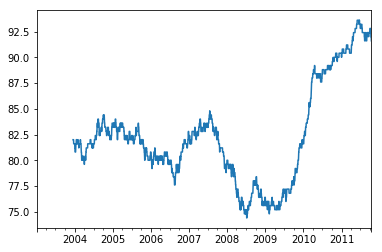

In [155]:
# while we can compute sample quantiles using rolling_quantile, we might be interested in the percentile rank
# of a particular value over the sample
from scipy.stats import percentileofscore

score_at_2percent = lambda x: percentileofscore(x, 0.02)
# result = pd.rolling_apply(returns.AAPL, 250, score_at_2percent)
result = returns.AAPL.rolling(250).apply(score_at_2percent)
result.plot()

### Performance and Memory Usage Notes

In [80]:
# if you have a large collection of low=frequency time series, the memory footprint 
# of the indexes will not be as significant
# pandas has been highly optimized for data alignment operations 
# An example of aggregating 10MM date points to OHLC
rng = pd.date_range('1/1/2000', periods=10000000, freq='10ms')
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ts

2000-01-01 00:00:00.000    1.063467
2000-01-01 00:00:00.010   -0.021919
2000-01-01 00:00:00.020   -1.821324
2000-01-01 00:00:00.030    0.145499
2000-01-01 00:00:00.040    0.707918
2000-01-01 00:00:00.050    2.947575
2000-01-01 00:00:00.060   -0.834203
2000-01-01 00:00:00.070   -0.725848
2000-01-01 00:00:00.080    0.481386
2000-01-01 00:00:00.090   -0.891023
2000-01-01 00:00:00.100    0.190819
2000-01-01 00:00:00.110    0.073443
2000-01-01 00:00:00.120    1.092719
2000-01-01 00:00:00.130   -0.974556
2000-01-01 00:00:00.140    0.076406
2000-01-01 00:00:00.150    0.003160
2000-01-01 00:00:00.160    1.440217
2000-01-01 00:00:00.170    0.635327
2000-01-01 00:00:00.180   -1.028306
2000-01-01 00:00:00.190   -1.147590
2000-01-01 00:00:00.200   -1.117678
2000-01-01 00:00:00.210    0.962327
2000-01-01 00:00:00.220   -0.066639
2000-01-01 00:00:00.230   -0.387591
2000-01-01 00:00:00.240    0.374949
2000-01-01 00:00:00.250   -1.185288
2000-01-01 00:00:00.260    0.855926
2000-01-01 00:00:00.270    0

In [81]:
ts.resample('15min', how='ohlc').info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 112 entries, 2000-01-01 00:00:00 to 2000-01-02 03:45:00
Freq: 15T
Data columns (total 4 columns):
open     112 non-null float64
high     112 non-null float64
low      112 non-null float64
close    112 non-null float64
dtypes: float64(4)
memory usage: 4.4 KB


/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:1: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).ohlc()
  """Entry point for launching an IPython kernel.


In [82]:
%timeit ts.resample('15min', how='ohlc')

/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:257: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).ohlc()


10 loops, best of 3: 70.6 ms per loop


In [83]:
# the runtime may depend slightly on the relative size of the aggregated results, 
# higher frequency aggregates unsurprisingly take longer to computer
rng = pd.date_range('1/1/2000', periods=10000000, freq='1s')
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ts

2000-01-01 00:00:00    0.033383
2000-01-01 00:00:01    0.688784
2000-01-01 00:00:02   -1.367984
2000-01-01 00:00:03   -0.445928
2000-01-01 00:00:04   -0.915112
2000-01-01 00:00:05   -0.182741
2000-01-01 00:00:06   -0.360908
2000-01-01 00:00:07   -0.096508
2000-01-01 00:00:08   -0.705650
2000-01-01 00:00:09    1.524525
2000-01-01 00:00:10    0.559837
2000-01-01 00:00:11   -1.802569
2000-01-01 00:00:12   -1.919762
2000-01-01 00:00:13    0.513449
2000-01-01 00:00:14    0.711695
2000-01-01 00:00:15    0.245545
2000-01-01 00:00:16   -1.462499
2000-01-01 00:00:17   -0.796907
2000-01-01 00:00:18   -1.037934
2000-01-01 00:00:19    0.458211
2000-01-01 00:00:20   -0.299729
2000-01-01 00:00:21    0.042376
2000-01-01 00:00:22   -0.605454
2000-01-01 00:00:23   -0.795299
2000-01-01 00:00:24    0.149896
2000-01-01 00:00:25   -1.003038
2000-01-01 00:00:26    1.215163
2000-01-01 00:00:27    0.580470
2000-01-01 00:00:28    0.345038
2000-01-01 00:00:29   -0.411128
                         ...   
2000-04-